In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import err_ranges

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importing datasets 
fert_rate = pd.read_csv(r'fertility_rate.csv')
life_exp = pd.read_csv(r'life.csv')


#consolidating the two dataframes for 2019
df2019 = pd.DataFrame()
df2019['fert_rate'] = fert_rate['2019'] #taking GDP per capita of the year 1980
df2019['life_exp'] = life_exp['2019'] #taking life expectency of the year 1980

df2019['country'] = fert_rate['Country Name']
df2019.dropna(how='any',inplace=True)


#consolidating the two dataframes for 1979
df1979 = pd.DataFrame()
df1979['fert_rate'] = fert_rate['1979'] #taking GDP per capita of the year 1980
df1979['life_exp'] = life_exp['1979'] #taking life expectency of the year 1980

df1979['country'] = fert_rate['Country Name']
df1979.dropna(how='any',inplace=True)

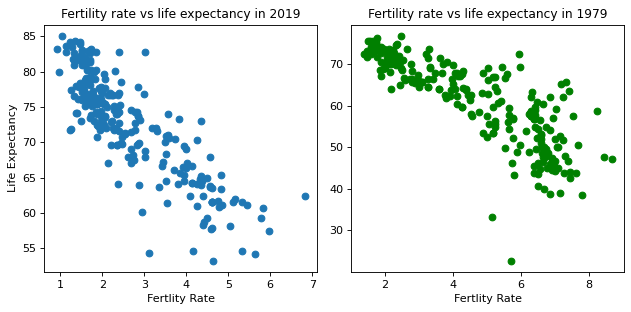

In [3]:
import matplotlib.pyplot as plt


#checking relation between life exp and fertility rate using scatter plot
plt.figure(figsize=(8,4),dpi=80)

plt.subplot(1,2,1)
plt.scatter(df2019.fert_rate,df2019.life_exp)
plt.xlabel('Fertlity Rate')
plt.ylabel('Life Expectancy')
plt.title('Fertility rate vs life expectancy in 2019',fontsize=11)

plt.subplot(1,2,2)
plt.scatter(df1979.fert_rate,df1979.life_exp,color='green')
plt.xlabel('Fertlity Rate')
plt.title('Fertility rate vs life expectancy in 1979',fontsize=11)
plt.tight_layout()
plt.show()

number of iterations 1402
number of cluster centres 3
[[0.15882595 0.89124078]
 [0.75860984 0.45396615]
 [0.58496777 0.67828174]]
3
(0.263738, 0.307831, 0.422789)
(0.488697, 0.485318, 0.471008)
(0.736488, 0.680629, 0.424028)
[[0.15882595 0.89124078]
 [0.75860984 0.45396615]
 [0.58496777 0.67828174]]


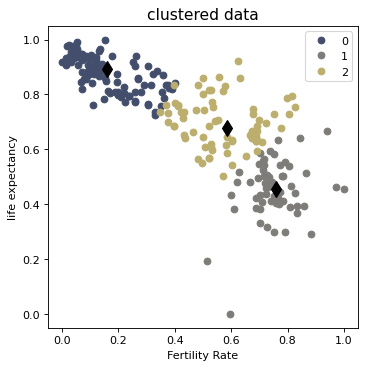

In [4]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df1979.iloc[:,:2])
scaled_df = pd.DataFrame(scaled_df)

# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=2000, preference=-3,random_state=123)
ap.fit(scaled_df)
labels = ap.labels_
cen = ap.cluster_centers_

x = scaled_df[0]
y = scaled_df[1]

# extract labels and centres
print("number of iterations", ap.n_iter_)
print("number of cluster centres", len(cen))

print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0),dpi = 80)
print(len(cen))

rgb = sns.color_palette('cividis', len(cen)) #setting a color palette 

for l in range(0, len(cen)):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=6, label= l,color=rgb[l])
    print(rgb[l])
print(cen)    
# show cluster centres
for ic in range(len(cen)):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.legend()
plt.xlabel("Fertility Rate")
plt.ylabel("life expectancy")
plt.title('clustered data',fontsize=14)
plt.show()

In [5]:
df1979['labels'] = labels

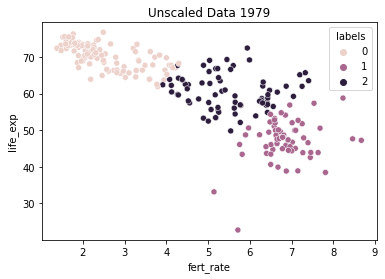

In [6]:
import seaborn as sns

sns.scatterplot(data=df1979,
               x='fert_rate',
               y='life_exp',hue='labels')
plt.title('Unscaled Data 1979')
plt.show()

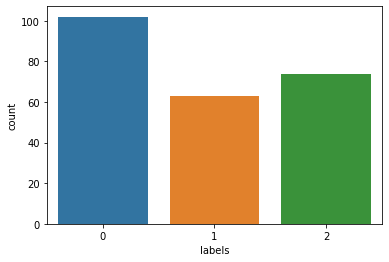

In [7]:
sns.countplot(x=df1979.labels)
plt.show()

In [8]:
df1979.groupby(['labels'])['life_exp'].mean().to_frame()

,life_exp
labels,
0,70.094311
1,47.255349
2,60.386310


lets select a country from label '0' and check how it performed over the years

In [9]:
df1979[df1979['labels'] == 0].country.unique()

array(['Aruba', 'Albania', 'Argentina', 'Armenia', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Barbados',
       'Brunei Darussalam', 'Canada', 'Central Europe and the Baltics',
       'Switzerland', 'Channel Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Caribbean small states', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'Spain', 'Estonia',
       'European Union', 'Finland', 'Fiji', 'France', 'United Kingdom',
       'Georgia', 'Greece', 'Greenland', 'Guam', 'High income',
       'Hong Kong SAR, China', 'Croatia', 'Hungary', 'IBRD only',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Korea, Rep.', 'Lebanon', 'Sri Lank

In [10]:
china = life_exp[life_exp['Country Name'] == 'China'].drop(life_exp.columns[:4],axis =1).T.reset_index()
china['fert_rate'] = fert_rate[fert_rate['Country Name'] == 'China'].drop(fert_rate.columns[:4],axis = 1).T.reset_index(drop=True)

china.columns = ['Year','Life_exp','Fert_rate']
china.dropna(how='any',inplace=True)


china_original = china.copy()
china_original.Year = pd.to_numeric(china_original.Year)

In [11]:
scal = MinMaxScaler()
china[['Life_exp','Fert_rate']] = scal.fit_transform(china[['Life_exp','Fert_rate']])
china.Year = pd.to_numeric(china.Year)

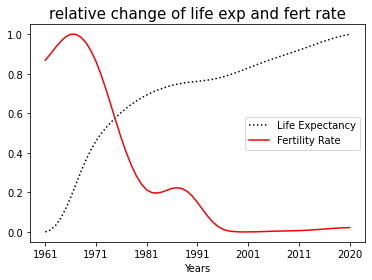

In [12]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots()

years = [1951,1961,1971,1981,1991,2001,2011,2020]


ax.plot(china.Life_exp,label = 'Life Expectancy',color ='k',ls=':')
ax.plot(china.Fert_rate,label = 'Fertility Rate',color='red')
ax.set_title('relative change of life exp and fert rate',fontsize = 15)
ax.legend(loc='best')
ax.set_xticklabels(years)
ax.set_xlabel('Years')
plt.show()

In [13]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [14]:
def plot_graph(df,i,param,covar): 
    
    sigma = np.sqrt(np.diag(covar)) #calculating the sigma value
    
    year = np.arange(1960, 2031) #defining range of years for prediction
    forecast = logistic(year, *param) #predicting
    
    #calculating the upper and lower intervals
    low, up = err_ranges(year, logistic, param, sigma)
    
    plt.figure()
    
    #plotting the figure
    plt.plot(df.Year,df[i],label=i) #original data

    plt.plot(year, forecast, label="forecast",color = 'k',ls=':') #fitted data
    
    #filling color between the confidence intervals
    plt.fill_between(year, low, up, color="yellow")
    plt.xlabel("year")
    plt.ylabel(i)
    plt.legend()

In [15]:
import scipy.optimize as  opt
param_le, covar_le = opt.curve_fit(logistic, china_original.Year, china_original.Life_exp,p0=(3e12, 0.03, 2000.0))

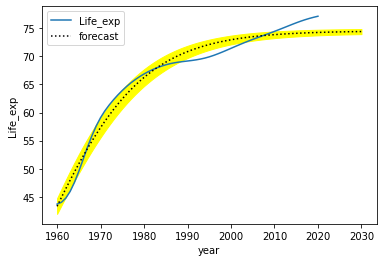

In [16]:
from err_ranges import err_ranges
plot_graph(china_original,i='Life_exp',param = param_le,covar = covar_le)


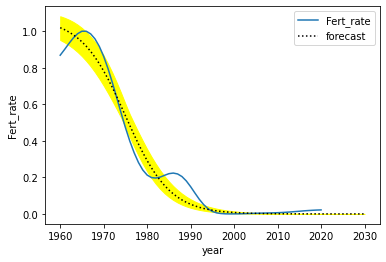

In [17]:
param_fr, covar_fr = curve_fit(logistic, china.Year, china.Fert_rate,maxfev=3000,p0=(10e12, 0.03, 2000.0))
plot_graph(china,i='Fert_rate',param=param_fr,covar=covar_fr)